In [73]:
import zipfile as zf
files = zf.ZipFile("idd20k_lit.zip", 'r')
files.extractall('idd20k_lit')
files.close()

In [74]:
import os

if os.path.exists("idd20k_lit"):
    print("The file exists.")

else:
    print("The file does not exist.")

The file exists.


In [75]:
pwd

'C:\\Users\\Mahboob'

In [76]:
import cv2, os, random
import numpy as np
import shutil 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,concatenate,Input,LSTM, Reshape,Permute
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv1D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization


from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import he_normal
from time import time
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K

In [20]:
!pip install opencv-python

In [77]:
os. listdir('idd20k_lit/idd20k_lite1')

['gtFine', 'idd2.py', 'leftImg8bit']

In [78]:
#!pip install tensorflow

In [79]:
data = 'idd20k_lit/idd20k_lite1/'

img_train = data + 'leftImg8bit/train/'
seg_train = data + 'gtFine/train/'

img_test = data + 'leftImg8bit/val/'
seg_test = data + 'gtFine/val/'
img_train_files = sorted(os.listdir(img_train))
seg_train_files = sorted(os.listdir(seg_train))
img_test_files = sorted(os.listdir(img_test))
seg_test_files = sorted(os.listdir(seg_test))
train_img = os.listdir(img_train)
train_img.sort()
train_seg = os.listdir(seg_train)
train_seg.sort()

test_img = os.listdir(img_test)
test_img.sort()
test_seg = os.listdir(seg_test)
test_seg.sort()
train_seg[:6]

['0000002_inst_label.png',
 '0000002_label.png',
 '0000097_inst_label.png',
 '0000097_label.png',
 '0000192_inst_label.png',
 '0000192_label.png']

In [80]:
# separating semantic and instance segmentation labels
train_seg_label=[]
train_inst_seg=[]
for i in range(1,len(train_seg)):
    if(i%2 !=0):
        train_seg_label.append(train_seg[i])
    else:
        train_inst_seg.append(train_seg[i])

test_seg_label=[]
test_inst_seg=[]
for i in range(len(test_seg)):
    if(i%2 !=0):
        test_seg_label.append(test_seg[i])
    else:
        test_inst_seg.append(test_seg[i])
print(train_img[:5])
print(train_seg_label[:5])
print(test_img[:5])
print(test_seg_label[:5])

['0000002_image.jpg', '0000097_image.jpg', '0000192_image.jpg', '0000215_image.jpg', '0000247_image.jpg']
['0000002_label.png', '0000097_label.png', '0000192_label.png', '0000215_label.png', '0000247_label.png']
['0000000_image.jpg', '000065_image.jpg', '0001080_image.jpg', '000190_image.jpg', '0001923_image.jpg']
['0000000_label.png', '000065_label.png', '0001080_label.png', '000190_label.png', '0001923_label.png']


In [81]:
for i in range(len(train_img)):
    first_img = cv2.imread('idd20k_lit/idd20k_lite1/leftImg8bit/train/'+train_img[0])
    img = cv2.imread('idd20k_lit/idd20k_lite1/leftImg8bit/train/'+train_img[i])
    if(first_img.shape == img.shape):
        if(i==len(train_img)-1):
            print('Number of train Images =',len(train_img))
            print('All Train Images have same shape')
            print('Shape of all Train images =',img.shape)
        continue
    else:
        print(train_img[i]+' has shape :',img.shape)
print('='*80)

for i in range(len(train_seg_label)):
    first_img = cv2.imread('idd20k_lit/idd20k_lite1/gtFine/train/'+train_seg_label[0])
    img = cv2.imread('idd20k_lit/idd20k_lite1//gtFine/train/'+train_seg_label[i])
    if(first_img.shape == img.shape):
        if(i==len(train_img)-1):
            print('Number of train labels =',len(train_seg_label))
            print('All Train Labels have same shape')
            print('Shape of all Train Labels =',img.shape)
        continue
    else:
        print(train_seg_label[i]+' has shape :',img.shape)
print('='*80)

for i in range(len(test_img)):
    first_img = cv2.imread('idd20k_lit/idd20k_lite1/leftImg8bit/val/'+test_img[0])
    img = cv2.imread('idd20k_lit/idd20k_lite1/leftImg8bit/val/'+test_img[i])
    if(first_img.shape == img.shape):
        if(i==len(test_img)-1):
            print('Number of Test Images =',len(test_img))
            print('All Test Images have same shape')
            print('Shape of all Test images =',img.shape)
        continue
    else:
        print(test_img[i]+' has shape :',img.shape)
print('='*80)

Number of train Images = 1380
All Train Images have same shape
Shape of all Train images = (227, 320, 3)
Number of train labels = 1380
All Train Labels have same shape
Shape of all Train Labels = (227, 320, 3)
Number of Test Images = 204
All Test Images have same shape
Shape of all Test images = (227, 320, 3)


In [82]:
from sklearn.model_selection import train_test_split

X_tr,X_cr, y_tr, y_cr = train_test_split(train_img, train_seg_label, test_size=0.25, random_state=15)
print(X_tr[:5])
print(y_tr[:5])
print(X_cr[:5])
print(y_cr[:5])

['0043118_image.jpg', '881557_image.jpg', '862328_image.jpg', '960225_image.jpg', 'frame0731_image.jpg']
['0043118_label.png', '881557_label.png', '862328_label.png', '960225_label.png', 'frame0731_label.png']
['355117_image.jpg', 'frame7284_image.jpg', '978273_image.jpg', 'frame7149_image.jpg', '010441_image.jpg']
['355117_label.png', 'frame7284_label.png', '978273_label.png', 'frame7149_label.png', '010441_label.png']


In [83]:
# Resizing image height to 256 beacuse to send as image as inout to uNET model the height and width of the image should
# multiples of 32
height=256
width=320
n_classes=7
def prepare_image_data(path,data):
    src=path+data
    img = cv2.imread(src)
    img=cv2.resize(img,(width,height))
    img = np.float32(img)  / 255          #normalization
    return img

def prepare_label_data(path,data):
    label = np.zeros((height, width, n_classes))
    src=path+data
    img = cv2.imread(src)
    img=cv2.resize(img,(width,height))
    img1=img[:,:,0]
    for i in range(n_classes):
        label[:,:,i] = (img1==i).astype(int)
    return label

In [84]:
X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []
for i in range(len(X_tr)):
    X_train.append(prepare_image_data(img_train,X_tr[i]))

for i in range(len(y_tr)):
    y_train.append(prepare_label_data(seg_train,y_tr[i]))

for i in range(len(X_cr)):
    X_val.append(prepare_image_data(img_train,X_cr[i]))

for i in range(len(y_cr)):
    y_val.append(prepare_label_data(seg_train,y_cr[i]))
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [85]:
#for i in range(len(test_img)):
    #X_test.append(prepare_image_data(img_test,X_cr[i]))

#for i in range(len(test_seg)):
    #y_test.append(prepare_label_data(seg_test,y_cr[i]))
#X_test=np.array(X_val)
#y_test=np.array(y_val)
print('Train Data : ')
print('Images-',X_train.shape)
print('Labels-',y_train.shape)
print('='*40)
print('Validation Data : ')
print('Images-',X_val.shape)
print('Labels-',y_val.shape)
print('='*40)

Train Data : 
Images- (1035, 256, 320, 3)
Labels- (1035, 256, 320, 7)
Validation Data : 
Images- (345, 256, 320, 3)
Labels- (345, 256, 320, 7)


In [86]:
tf.keras.backend.clear_session()
import random as rn
np.random.seed(24)
tf.random.set_seed(28)
rn.seed(12)
def IoU(y_val, y_pred):
    class_iou = []
    n_classes = 7
    
    y_predi = np.argmax(y_pred, axis=3)
    y_truei = np.argmax(y_val, axis=3)
    
    for c in range(n_classes):
        TP = np.sum((y_truei == c) & (y_predi == c))
        FP = np.sum((y_truei != c) & (y_predi == c))
        FN = np.sum((y_truei == c) & (y_predi != c)) 
        IoU = TP / float(TP + FP + FN)
        if(float(TP + FP + FN) == 0):
          IoU=TP/0.001
        class_iou.append(IoU)
    MIoU=sum(class_iou)/n_classes
    return MIoU
def miou( y_true, y_pred ) :
    score = tf.py_function( lambda y_true, y_pred : IoU( y_true, y_pred).astype('float32'),
                        [y_true, y_pred],
                        'float32')
    return score

In [ ]:
def unet(pretrained_weights = None):

    inputs = Input(shape=(256, 320,3))
    print(inputs , inputs.shape)

    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)

    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv4)
    drop4 = Dropout(0.5)(conv4)

    up5 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(UpSampling2D(size = (2,2))(drop4))
    merge5 = concatenate([conv3,up5], axis = 3)
    conv5 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(merge5)
    conv5 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv5)

    up6 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(UpSampling2D(size = (2,2))(conv5))
    merge6 = concatenate([conv2,up6], axis = 3)
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(merge6)
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv6)

    up7 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv1,up7], axis = 3)
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(merge7)
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv7)

    conv8 = Conv2D(7, 3, activation = 'relu', padding = 'same', kernel_initializer = keras.initializers.he_normal(seed=24))(conv7)
    out = (Activation('softmax'))(conv8)
  
    model = Model(inputs,out)

    return model
%reload_ext tensorboard
unet_model2 = unet()
unet_model2.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 256, 320, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") (None, 256, 320, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)  

In [88]:
log_dir_3 = os.path.join('unet_model2') 
tensorboard_callback3 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_3) 
unet_model1.compile(optimizer = Adam(0.0001), loss = 'categorical_crossentropy',metrics = [miou])
x=X_train.shape[0]//345
x
345
history3 = unet_model1.fit(X_train, y_train,steps_per_epoch=x,epochs=40,verbose=1, validation_data=(X_val, y_val),callbacks=[tensorboard_callback3],batch_size=10)

Epoch 1/40
3/3 [==============================] - 215s 94s/step - loss: 1.3948 - miou: 0.2257 - val_loss: 1.2407 - val_miou: 0.2166
Epoch 2/40
3/3 [==============================] - 209s 96s/step - loss: 1.4886 - miou: 0.1995 - val_loss: 1.2751 - val_miou: 0.2252
Epoch 3/40
3/3 [==============================] - 253s 119s/step - loss: 1.1571 - miou: 0.2703 - val_loss: 1.3165 - val_miou: 0.2591
Epoch 4/40
3/3 [==============================] - 257s 117s/step - loss: 1.2521 - miou: 0.2765 - val_loss: 1.1821 - val_miou: 0.2917
Epoch 5/40
3/3 [==============================] - 215s 97s/step - loss: 1.0758 - miou: 0.3024 - val_loss: 1.1313 - val_miou: 0.2806
Epoch 6/40
3/3 [==============================] - 192s 89s/step - loss: 1.0679 - miou: 0.2849 - val_loss: 1.0499 - val_miou: 0.2915
Epoch 7/40
3/3 [==============================] - 190s 87s/step - loss: 1.0826 - miou: 0.2903 - val_loss: 1.0245 - val_miou: 0.2886
Epoch 8/40
3/3 [==============================] - 189s 88s/step - loss: 0.

In [89]:
%tensorboard --logdir unet_model2
#Reusing TensorBoard on port 6007 (pid 4601), started 0:07:19 ago. (Use '!kill 4601' to kill it.)
y_pred = unet_model1.predict(X_val)
print('MIoU for UNet model is :',IoU(y_val, y_pred))

11/11 [==============================] - 150s 14s/step
MIoU for UNet model is : 0.329937791597149


'!kill 4601'

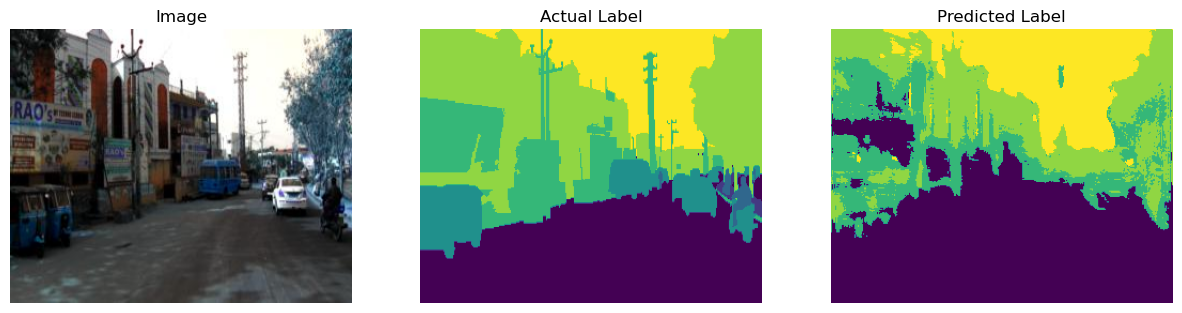

In [91]:
def plot_images(image, label, predicted_label):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')
    axes[1].imshow(label)
    axes[1].set_title('Actual Label')
    axes[1].axis('off')
    axes[2].imshow(predicted_label)
    axes[2].set_title('Predicted Label')
    axes[2].axis('off')
    plt.show()

# Select a random index from the validation data
index = random.randint(0, len(X_val)-1)
image = X_val[index]
label = np.argmax(y_val[index], axis=2)
predicted_label = np.argmax(y_pred[index], axis=2)

plot_images(image, label, predicted_label)